# Chapter3 
# Classification

# MNIST

In [72]:
# in this chapter,we will be using the MNIST datasets.
# Scikit-learn provides many helper functions to download popular datasets.MNIST is one of them.The following code
#fetches the MNIST dataset:


from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [73]:
# DESCR key describing the dataset 
# A data key containing an array with one row per instance and one column per feature
# A target key containing an array with the labels

# look at these arrays:

X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [74]:
y.shape

(70000,)

In [6]:
#there are 70000 images,and each image has 784 features.(because each image is 28*28 pixels)

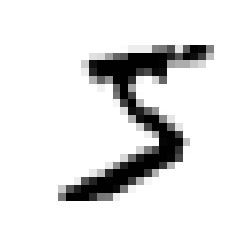

In [134]:
#let's take a peek at one digit from the data set.

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [77]:
y[0]

'5'

In [78]:
#note that the label is a string.we prefer numbers,so let's cast y to integers:

import numpy as np
y=y.astype(np.uint8)

In [79]:
#The MNIST dataset is actually already split into a training set(the first 60,000 images)and a test set(the last 10,000 images):

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# Training a Binary Classifier 

In [80]:
#Let's simplify the problem for now and only try to identify one digit.for example,the number 5. This '5-detector' will 
#be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create  
#the target vectors for this classification task:


y_train_5 = (y_train == 5)   # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [81]:
# Okay, let's pick a classifier and train it.a good place to start is with a Stochastic Gradient Descent(SGD)classifier,
#using Scikit-learn's SGDClassifier class.this classifier has the advatage of being capable of handling very larg 
#datasets efficiently.Let's create an SGDClassifier and train it on the whole training set:


from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#now you can use it to detect images of the number 5:

sgd_clf.predict([some_digit])



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([False])

# Performance Measures

In [22]:
# evaluating a classifier is often trickier than evaluating a regressor.


# Measuring Accuracy Using Cross-Validation

In [23]:
# A good way to evaluate a model is to use cross-validation,just as you did in chapter 2.

In [82]:
# Let's use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation,with 
# three folds. 

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.9532 , 0.95125, 0.9625 ])

In [25]:
# Wow! above 95% accuracy!!! but accuracy is generally not the preferred performance measure for classifier... 

# Confusion Matrix

In [ ]:
# a much better way to evaluate the performance of a classifier is to look at the 
#confusion matrix .For example,to know the number of times the classifier confused images
#of 5s with 3s,you would look in the 5th row and 3th column of the confusion matrix.


#to compute the confusion matrix,you first need to have a set of predictions,so they can be
#compared to the actual targets.

In [83]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [84]:
#just like the cross_val_score() function,cross_val_predict() performs
#K-fold cross-validation,but instead of returning the evaluation scores,it 
#returns the predictions made on each test fold.

#now you are ready to get the confusion matrix using the confusion_matrix() function.just 
#pass it the target classes (y_train_5) and the predicted classes (y_train_pred):


from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52992,  1587],
       [ 1074,  4347]])

In [85]:
# 52992 of them were correctly classified as non-5s(true negatives),while 
#the remaining 1587 were wrongly classified as 5s(false positives).
#the second row considers the images of 5s: 1074 were wrongly classified as non-5s(false negative)
#while the remaining 4347 were correctly classified as 5s(true positives).A perfect classifier 
#would have only true positives and true negatives,so its confusion matrix would have
#nonzero values only on its main diagonal(top left to bottom right):


y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# precision and Recall

In [86]:
#scikit-learn provides several functions to compute classifier metrics,including
#precision and recall:

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.7325581395348837

In [87]:
recall_score(y_train_5, y_train_pred)

0.8018815716657444

In [18]:
#it is often convenient to combine precision and recall into a 
#single metric called the F1 score,in particular if you need a simple way to
#compare two classifiers.

#to compute the F1 score,simply call the f1_score() function:

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.765653896961691

# Precision/Recall Tradeoff

In [88]:
#tradeoff : increasing precision reduces recall,and vice versa. (yani rabeteye ax darand)
# to understand this tradeoff,let's look at how the SGDClassifier makes its classification 
#decisions.for each instance,it computes a score based on a decision function,and if that
#score is greater than a threshold,it assigns the instance to the positive class,or else it 
#assigns it to the negative class.

#you can call its decision_function() method,which returns a score for each instance,and 
#then make predictions based on those scores using any threshold you want:

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-45148.19955869])

In [89]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [90]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [91]:
#this confirms that raising the threshold decreases recall.the image actually represents a
# 5,and the classifier detects it when the threshold is 0,but it misses it when the 
#threshold is increased to 200000.
# Now how do you decide which threshold to use?
#for this you will first need to get the scores of all instances in the training set using 
#the cross_val_predict() function again,but this time specifying that you want it to 
#return decision scores instead of predictions:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [92]:
#now with these scores you can compute precision and recall for all possible thresholds using
#the prediction_recall_curve() function:

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


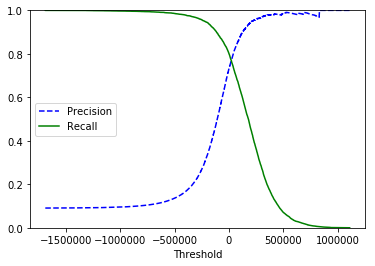

In [93]:
#finally you can plot precision and recall as functions of threshold value using Matplotlib:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
    

In [94]:
#let's suppose you decide to aim for 90% precision.you look up the plot and find that 
#you need to use a threshold of about 70000.to make predictions(on the training set for now),
#instead of calling the classifier's predict() method,you can just run this code:

y_train_pred_90 = (y_scores > 70000)

#let's check these predictions' precision and recall:
precision_score(y_train_5, y_train_pred_90)

0.8415374241402562

In [95]:
recall_score(y_train_5, y_train_pred_90)

0.6906474820143885

# The Roc Curve

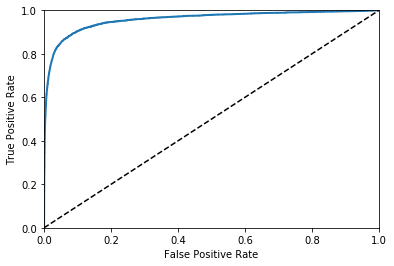

In [96]:
#the receiver operating characteristic(ROC) curve is another common tool used with binary
#classification.it is similar to the precision/recall curve,but instead of plotting precision
#versus recall,the ROC curve plot the true positive rate against the false positive rate...
#FPR is false positive rate
#TNR is true negative rate

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#then you can plot the FPR against the TPR using Matplotlib.

def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr, tpr, linewidth=2, label=lable)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [97]:
#once again there is a tradeoff: the higher the recall(TPR),the more falsepositives(FPR)the 
#classifier produces. the dotted line represents the ROC curve of a purely random classifier.
#a good classifier stays as far away from that line as possible(toward the top-left corner).


#one way to compare classifier is to measure the area under the curve(AUC).
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9584692857783504

In [55]:
#since the ROC curve is similar to the precision/recall (or PR)curve,you may wonder how to
#decide which one to use.as a rule of thump,you should prefer the PR curve whenever the 
#positive class is rare or when you care more about the false positive than the false negatives,
#and the ROC curve otherwise..


In [98]:
#let's train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the 
#SGDClassifier.
#the RandomForestClassifier class does not have a decision_function() method.instead,it has
#a predict_proba() method which returns an array containing a row per instance and a column 
#per class,each containing the probability that the given instance belongs to the given class.


from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


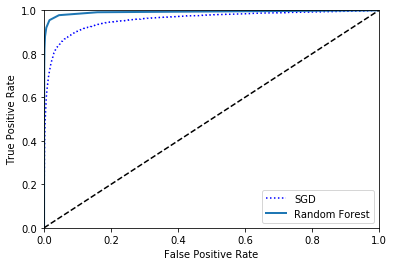

In [99]:
#But to plot a ROC curve,you need scores,not probabilities.a simple solution is to use the
#positive class's probability as the score:

y_scores_forest = y_probs_forest[:, 1]  #score = probe of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [100]:
#as you can see,the RandomForestClassifier's ROC curve looks much better than the
#SGDClassifier's:it comes much closer to the top-left corner.as a result,its ROC AUC score 
#is also significantly better:

roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [60]:
#Hopefully you now know how to train binary classifiers,choose the appropriate metric for
#your task,evaluate your classifiers using cross_validation,select the precision/recall 
#tradeoff that fits your needs,and compare various models using ROC curves and ROC AUC scores.
#now let's try to detect more than just the 5s.

# Multiclass Classification

In [61]:
#whereas binary classifiers distinguish between two classes, multiclass classifiers( also
#called multinomial classifiers)can distinguish between more than two classes.

In [ ]:
#some algorithms(such as Random Forest classifiers or naive Bayes classifiers)are capable 
#of handling multiple classes.others(such as Support Vector Machine classifiers or Linear 
#classifiers)are strictly binary classoifiers.however,there are various startegies that you
#can use to perform multiclass classification using multiple binary classifiers.


In [62]:
#for example,one way to create a system that can classify the digit images into 10 classes(
#from0 to 9)is to train 10 binary classifiers,one for each digit.this is called the
#one-versus-all(OvA)strategy(also called one-versus-the-rest).
#another strategy is to train a binary classifier for every pair of digits.this is called the 
#one-versus-one(OvO) strategy.


In [101]:
#Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
#classification task,and it automatically runs OvA(except for SVM classifiers for which it 
#uses OvO). let's try this with the SGDClassifier:


sgd_clf.fit(X_train, y_train)   #y_train,not y_train_5
sgd_clf.predict([some_digit])


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=uint8)

In [102]:
#to see that this is indeed the case,you can call the decision_function() method.
#instead of running just one score per instance,it now returns 10 scores,one per class:


some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-433195.51807197, -338154.39320296, -233775.78280018,
         -96549.33208399, -775699.13613034,  -45148.19955869,
        -536304.97603686, -298210.05377635, -535633.57179217,
        -490653.60782097]])

In [103]:
#The highest score is indeed the one corresponding to class 5:

np.argmax(some_digit_scores)

5

In [104]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [105]:
sgd_clf.classes_[5]

5

In [106]:
#if you want to force ScikitLearn to use one-versus-one or one-versus-all,you can use the 
#OneVsOneClassifier or OneVsRestClassifier classes.Simply create an instance and pass a binary 
#classifier to its constructor.for example,this code creates a multiclass classifier using the 
#OvO strategy,based on a SGDClassifier:


from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=uint8)

In [107]:
len(ovo_clf.estimators_)

45

In [108]:
#training a RandomForestClassifier is just as easy:

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [111]:
#this time Scikit-learn didn't have to run OvA or OvO because Random Forest classifiers can 
#directly classify instances into multiple classes. you can call predict_proba() to get the 
#list of probabilities that the classifier assigned to each instance for each class:

forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [112]:
#Now of course you want to evaluate these classifiers.let's evaluate the SGDClassifier's
#accuracy using the cross_val_score() function:

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.86872625, 0.87639382, 0.87848177])

In [113]:
#you can still do much better.for example,simply scaling the inputs,increases accuracy
# above 90%:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.90736853, 0.90884544, 0.91363705])

# Error Analysis

In [129]:
#here,we will assume that you have found a promising model and you want to find
#ways to improve it.One way to do this is to analyze the types of errors it makes.

#first you can look at the confusion matrix(just like you did earlier):


y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred) 
conf_mx

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]])

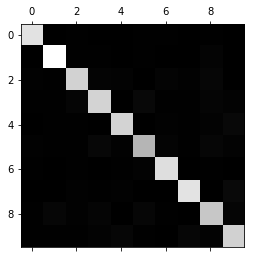

In [130]:
#that's a lot of numbers.It's often more convenient to look at an image representation
#of the confusion matrix,using Matplotlib's matshow() function:

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [131]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

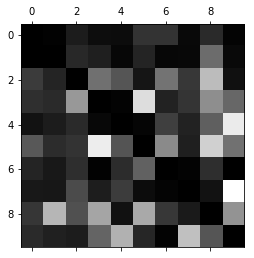

In [132]:
#now let's fill the diagonal with zeros to keep only the eerors,and let's plot the result:

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [136]:
#rows represent actual classes,while columns represent predicted classes.the columns for 
#classes 8 and 9 are quite bright,which tells you that many images get misclassified as 8s or 9s.
#similarly,the rows for classes 8 and 9 are also quite bright,telling you that 8s and 9s are 
#often confused with other digits.conversely,some rows are pretty dark,such as row 1: this 
#means that most 1s are classified correctly.

#Analyzing the cofusion matrix can often give you insights on ways to improve your classifier.
#Analyzing individual errors can also be a good way to gain insights on what your classifier 
#is doing and why it is failing.for example,let's plot examples of 3s and 5s :
#(tashkhise 3 , 5)

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))



<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

NameError: name 'plot_digits' is not defined

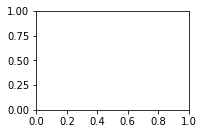

In [137]:
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
# ??????????????? why?????


# Multilabel Classification

In [ ]:
# until now each instance has always been assigned to just one class.in some cases you may
#want your classifier to output multiple classes for each instance.for example,consider a 
#face-recognition classifier: what it should do if it recognizes several people on the 
#same picture? Of course it should attach one label per person it recognizes.say the 
#classifier has been trained to recognize three faces,Ali, Bob, and Charlie.then when 
#it is shown a picture of Ali and Charlie,it should output[1, 0, 1](meaning "Ali yes,Bob no,
# Charlie yes"). Such a classification system that outputs multiple binary labels is called 
#a multilabel classification system.


In [141]:
#let's look at a simpler example,just for illustration purposes:

from sklearn.neighbors import KNeighborsClassifier 

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1 )
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [142]:
#so,it outputs two labels:


knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
#and it gets it right! the digit 5 is indeed not large(False) and odd(True).

In [ ]:
#there are many ways to evaluate a multilabel classifier.for example,one approach is to
#measure the F1 score for each individual label,then simply compute the average score. 
#like the bottom code:

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")



# Multioutput Classification

In [ ]:
# Multioutput Classification is simply a generalization of multilabel classification where
# each label can be multiclass.
# To illustrate this,let's build a system that removes noise from images.

#let's start by creating the training and tests by taking the MNIST images and adding noise 
#to their pixel intensities using NumPy's randint() function.the target images will be the 
#original images:


noise = np.rando.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise 
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
#now, let's train the classifier and make it clean this image:

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)